In [1]:
!pip install pandas


In [2]:
!pip install pandas


In [7]:
# Import necessary libraries
import pandas as pd

# Initialize an empty dataframe for the Add-Delete Table
columns = ["Root Word", "Added Morpheme", "Resulting Word", "Deleted Morpheme"]
morphology_table = pd.DataFrame(columns=columns)

# Function to add a morpheme
def add_morpheme(root, morpheme):
    global morphology_table
    new_word = root + morpheme  # Combine root and morpheme
    new_entry = pd.DataFrame([[root, morpheme, new_word, ""]], columns=columns)
    morphology_table = pd.concat([morphology_table, new_entry], ignore_index=True)
    return new_word

# Function to delete a morpheme
def delete_morpheme(word, morpheme):
    global morphology_table
    if word.endswith(morpheme):  # Ensure the morpheme exists at the end
        root_word = word[:-len(morpheme)]  # Remove the morpheme
        new_entry = pd.DataFrame([[root_word, "", word, morpheme]], columns=columns)
        morphology_table = pd.concat([morphology_table, new_entry], ignore_index=True)
        return root_word
    else:
        print("Error: Morpheme not found at the end of the word.")
        return word

# Function to display the table
def show_table():
    display(morphology_table)

# Example usage
add_morpheme("play", "ing")  # Adding "ing" to "play"
delete_morpheme("playing", "ing")  # Removing "ing" from "playing"
show_table()


,Root Word,Added Morpheme,Resulting Word,Deleted Morpheme
0,play,ing,playing,
1,play,,playing,ing


In [4]:
add_morpheme("jump", "ed")
delete_morpheme("jumped", "ed")
show_table()


,Root Word,Added Morpheme,Resulting Word,Deleted Morpheme
0,play,ing,playing,
1,play,,playing,ing
2,jump,ed,jumped,
3,jump,,jumped,ed


In [5]:
morphology_table.to_csv("morphology_table.csv", index=False)


In [6]:
root = input("Enter root word: ")
morpheme = input("Enter morpheme to add: ")
add_morpheme(root, morpheme)
show_table()


Enter root word: fair
Enter morpheme to add: ness


,Root Word,Added Morpheme,Resulting Word,Deleted Morpheme
0,play,ing,playing,
1,play,,playing,ing
2,jump,ed,jumped,
3,jump,,jumped,ed
4,fair,ness,fairness,


In [8]:
!pip install pandas matplotlib seaborn wordcloud


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


**MORPHOLOGICAL DATA TABLE**

In [10]:
# Sample Morphology Data
data = {
    "Root Word": ["play", "jump", "run", "talk", "move", "write", "read", "sing", "work", "help"],
    "Added Morpheme": ["ing", "ed", "ing", "ed", "ing", "ing", "er", "ing", "er", "ful"],
    "Resulting Word": ["playing", "jumped", "running", "talked", "moving", "writing", "reader", "singing", "worker", "helpful"],
    "Deleted Morpheme": ["", "ed", "", "ed", "", "ing", "", "ing", "", ""]
}

# Convert to DataFrame
morphology_df = pd.DataFrame(data)

# Display first few rows
print("Morphology Data Table:")
display(morphology_df)


Morphology Data Table:


,Root Word,Added Morpheme,Resulting Word,Deleted Morpheme
0,play,ing,playing,
1,jump,ed,jumped,ed
2,run,ing,running,
3,talk,ed,talked,ed
4,move,ing,moving,
5,write,ing,writing,ing
6,read,er,reader,
7,sing,ing,singing,ing
8,work,er,worker,
9,help,ful,helpful,


**BAR GRAPH FOR ADDED MORPHEMES**

<ipython-input-11-a6c4a7d953e0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=added_counts.index, y=added_counts.values, palette="coolwarm")


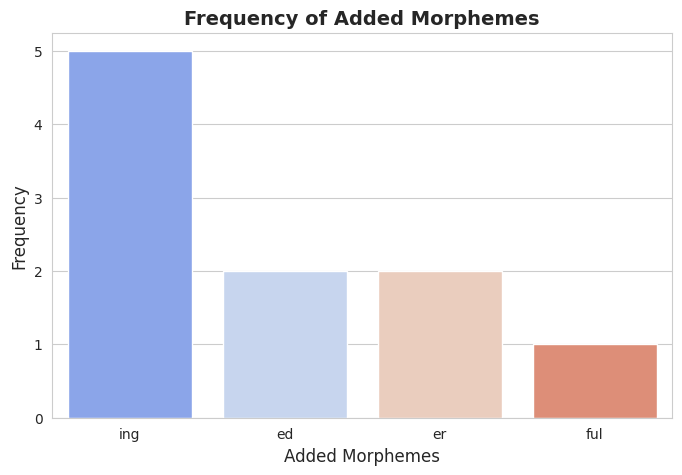

In [11]:
# Count frequency of added morphemes
added_counts = morphology_df["Added Morpheme"].value_counts()

# Set seaborn style
sns.set_style("whitegrid")

# Bar plot for added morphemes
plt.figure(figsize=(8, 5))
sns.barplot(x=added_counts.index, y=added_counts.values, palette="coolwarm")
plt.xlabel("Added Morphemes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Added Morphemes", fontsize=14, fontweight="bold")
plt.show()


**BAR PLOT FOR DELETED MORPHEMES**

<ipython-input-12-1886a7da3b4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deleted_counts.index, y=deleted_counts.values, palette="Reds_r")


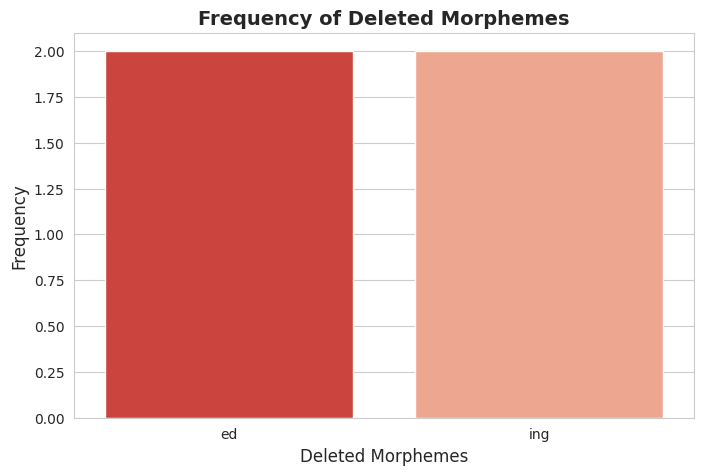

In [12]:
# Count frequency of deleted morphemes (ignoring empty values)
deleted_counts = morphology_df[morphology_df["Deleted Morpheme"] != ""]["Deleted Morpheme"].value_counts()

# Bar plot for deleted morphemes
plt.figure(figsize=(8, 5))
sns.barplot(x=deleted_counts.index, y=deleted_counts.values, palette="Reds_r")
plt.xlabel("Deleted Morphemes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Deleted Morphemes", fontsize=14, fontweight="bold")
plt.show()


**COMPARITIVE ANALYSIS**

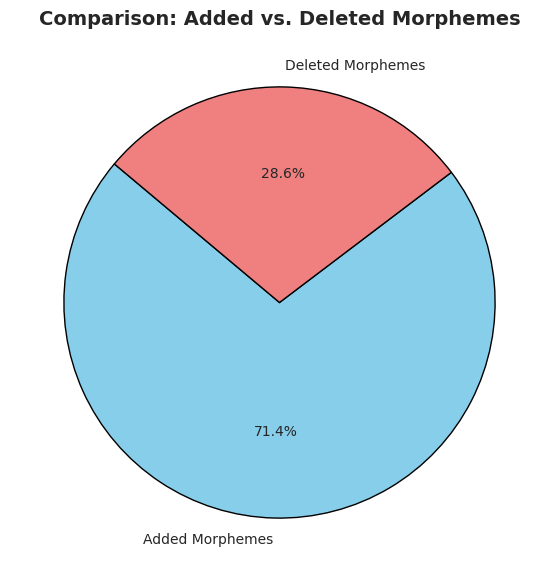

In [13]:
# Count of added and deleted morphemes
added_count = len(morphology_df["Added Morpheme"])
deleted_count = len(morphology_df[morphology_df["Deleted Morpheme"] != ""])

# Pie chart data
labels = ["Added Morphemes", "Deleted Morphemes"]
sizes = [added_count, deleted_count]
colors = ["skyblue", "lightcoral"]

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Comparison: Added vs. Deleted Morphemes", fontsize=14, fontweight="bold")
plt.show()


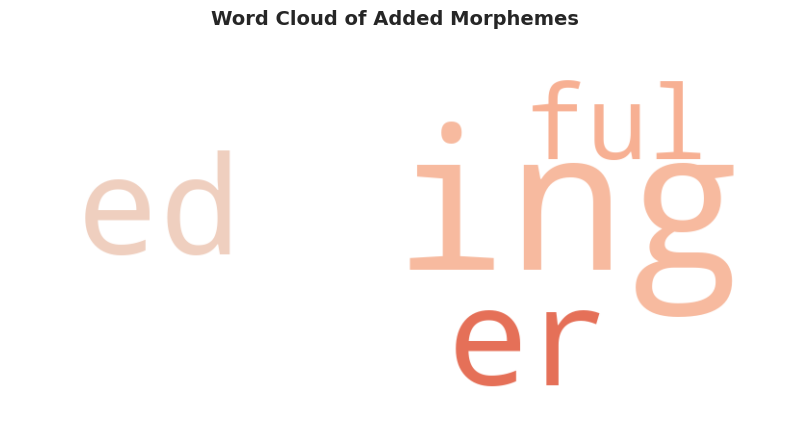

In [14]:
# Create a word cloud for added morphemes
wordcloud_text = " ".join(morphology_df["Added Morpheme"])
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(wordcloud_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Added Morphemes", fontsize=14, fontweight="bold")
plt.show()


In [15]:
!pip install pandas matplotlib seaborn wordcloud plotly


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go


<ipython-input-19-a1c00b73493f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=morphology_df["Added Morpheme"], palette="coolwarm")


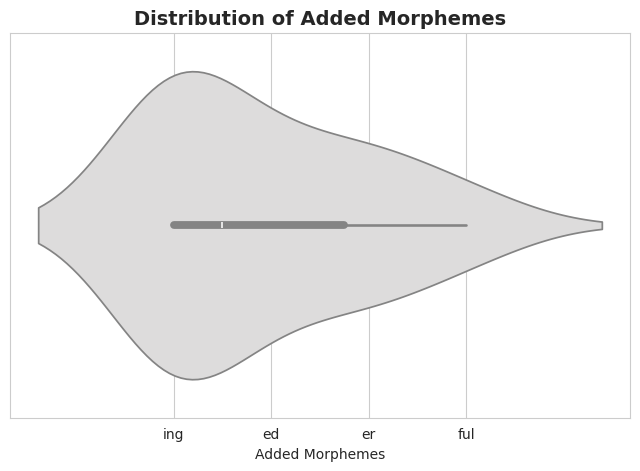

In [19]:
plt.figure(figsize=(8,5))
sns.violinplot(x=morphology_df["Added Morpheme"], palette="coolwarm")
plt.title("Distribution of Added Morphemes", fontsize=14, fontweight="bold")
plt.xlabel("Added Morphemes")
plt.show()


In [20]:
# Data for stacked bar chart
morpheme_types = ["Added Morpheme", "Deleted Morpheme"]
values = [added_counts.sum(), deleted_counts.sum()]

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name="Added Morphemes", x=[morpheme_types[0]], y=[values[0]], marker_color='skyblue'),
    go.Bar(name="Deleted Morphemes", x=[morpheme_types[1]], y=[values[1]], marker_color='salmon')
])

fig.update_layout(
    barmode='stack',
    title="Comparison: Added vs. Deleted Morphemes",
    xaxis_title="Morpheme Type",
    yaxis_title="Count",
    template="plotly_white"
)

fig.show()


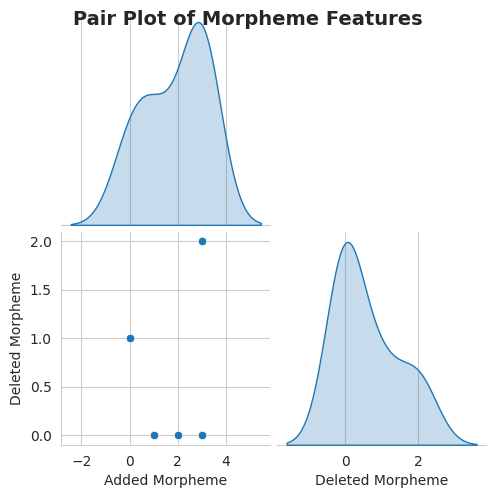

In [21]:
sns.pairplot(encoded_df, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Morpheme Features", fontsize=14, fontweight="bold")
plt.show()


In [23]:
# Create a bar plot with Plotly
fig = px.bar(
    x=added_counts.index,
    y=added_counts.values,
    title="Interactive Bar Chart: Frequency of Added Morphemes",
    labels={"x": "Morpheme", "y": "Frequency"},
    color=added_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()
